# Introduction

Matplotlib is the omnipresent plotting library for data science with Python. Seaborn is another Python data visualization tool, created on top of Matplotlib. In this cheat sheet I will use them along with Pandas’s plotting capabilities. Pandas integrates with Matplotlib to make plotting even easier.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# use this to display inline plots on Jupyter notebooks
%matplotlib inline 
%config Completer.use_jedi = False # solves autocompletion Mac: https://github.com/ipython/ipython/issues/10493

In [3]:
# data used in the examples:
df = pd.read_csv('datasets/pima-data-orig.csv')
df.head()

num_preg  glucose_conc  diastolic_bp  skin_thickness  insulin   bmi  \
0         6           148            72              35        0  33.6   
1         1            85            66              29        0  26.6   
2         8           183            64               0        0  23.3   
3         1            89            66              23       94  28.1   
4         0           137            40              35      168  43.1   

   diab_pred  age  diabetes  
0      0.627   50         1  
1      0.351   31         0  
2      0.672   32         1  
3      0.167   21         0  
4      2.288   33         1

# Histograms

Are used to get insights about data distribution. Too few bins can oversimplify reality and won’t show you the details, conversely too many bins tend to overcomplicate reality and won’t show the details.

## Pandas’s integration with Matplotlib

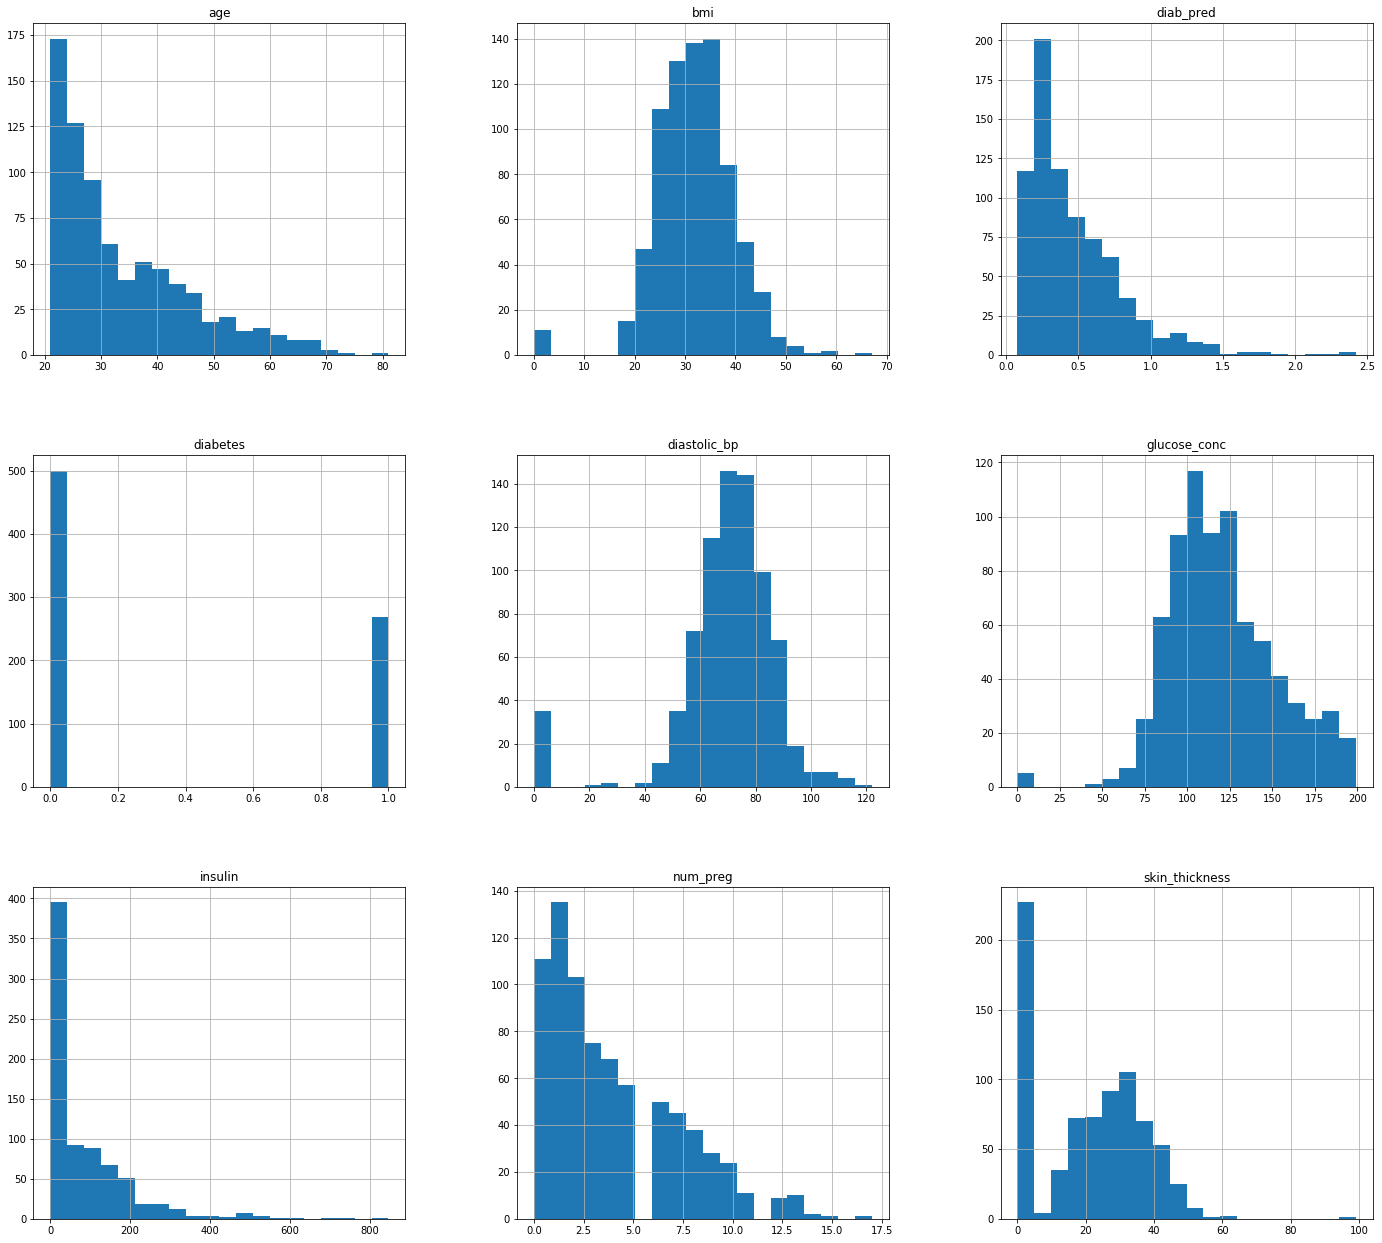

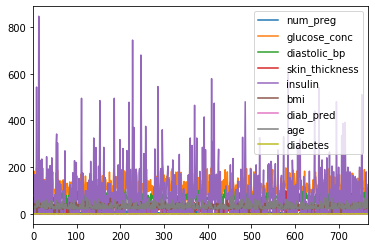

In [4]:
df.hist(bins=20, figsize=(24, 22))
# df['insulin'].hist(bins=20, figsize=(22, 20)) # This would print only one series
df.plot()

# Pairplot

## Seaborn

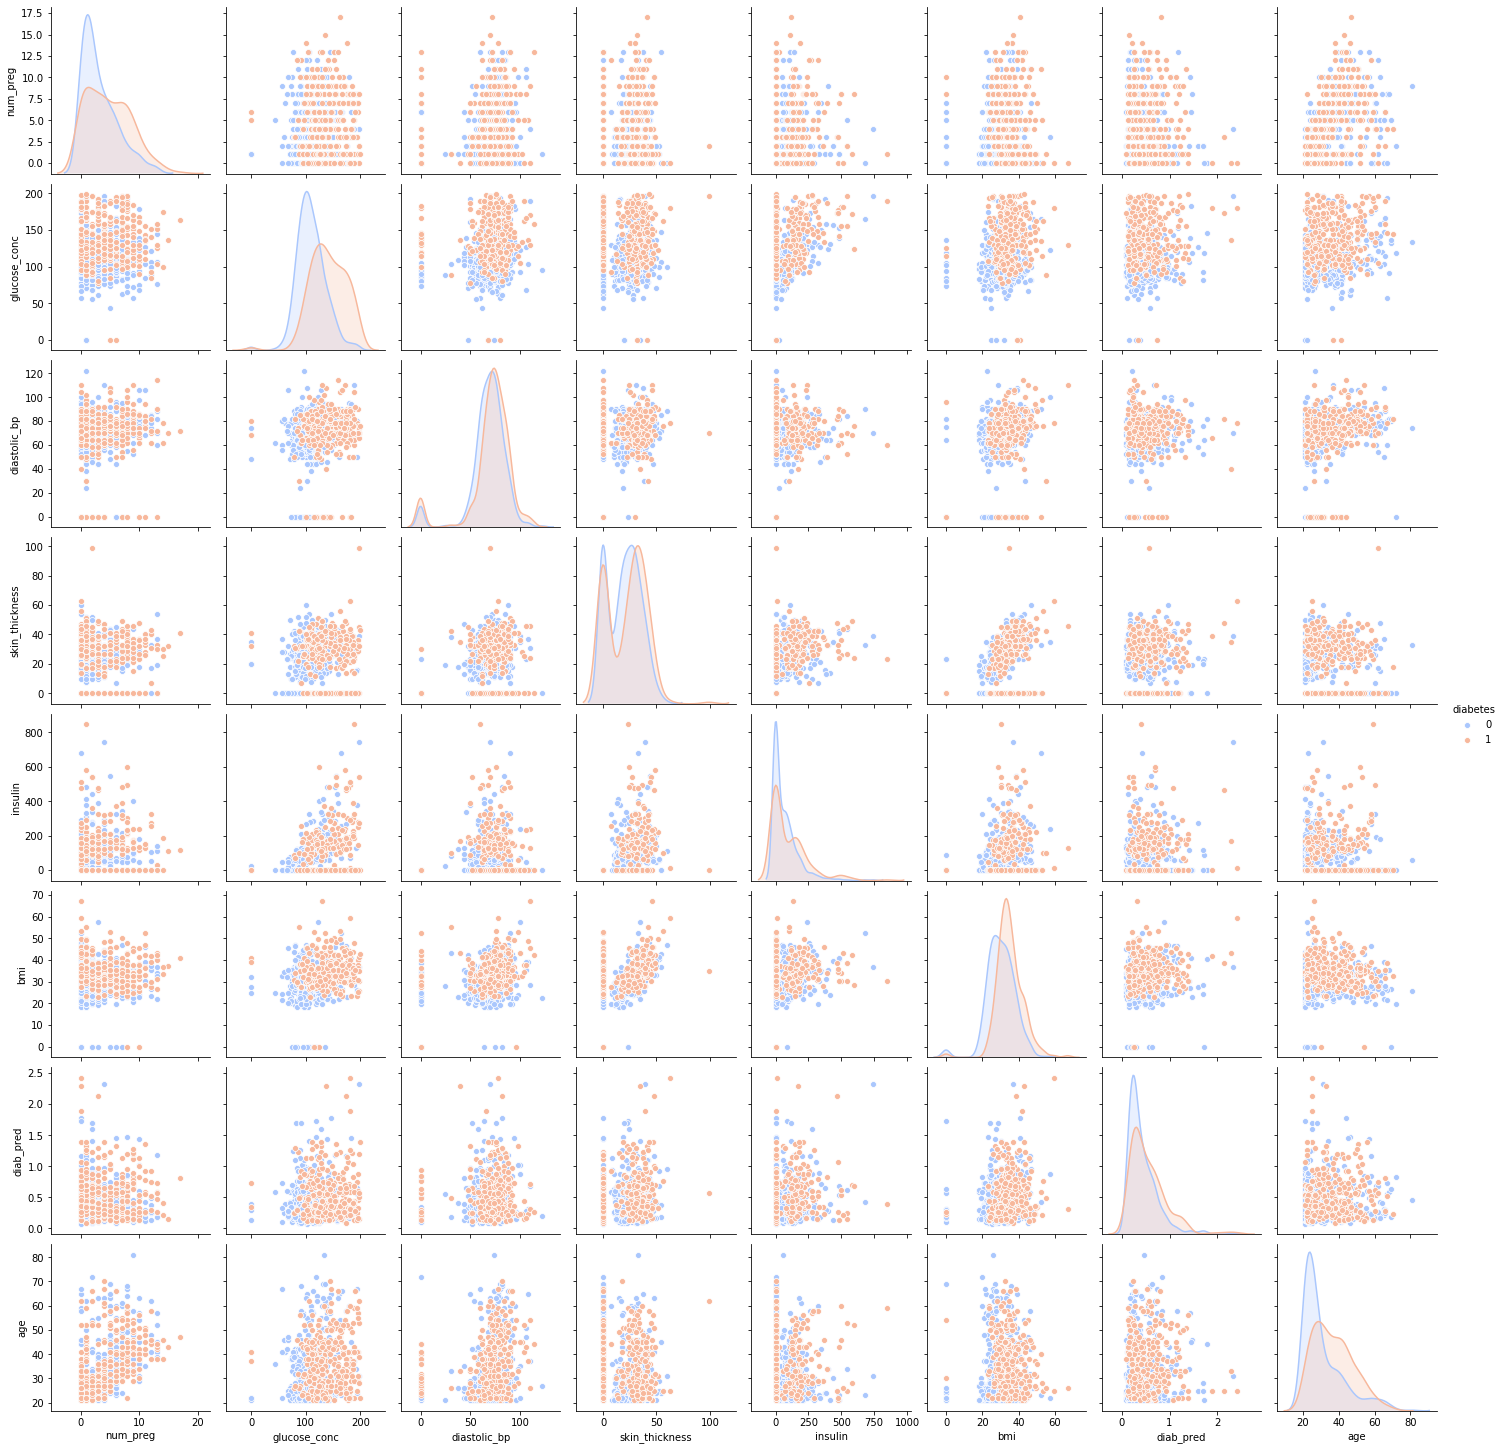

In [6]:
sns.pairplot(df,hue='diabetes',palette='coolwarm')

# Boxplot

## Pandas's Integration

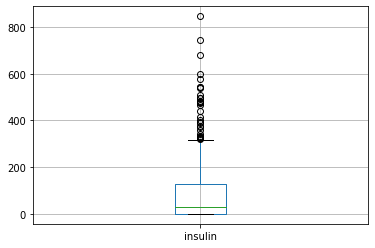

In [8]:
df.boxplot(column='insulin')
plt.show()

## Seaborn with Jitter

A boxplot summarizes the distribution of a numerical variable for one or several groups. Thus, it hides the underlying distribution and the number of points of each group. That makes this chart dangerous. This post gives an example of possible mistake, and 3 solutions to fix it.

Text(0.0, 1.0, 'Boxplot with jitter')

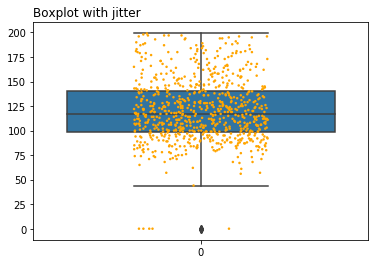

In [7]:
ax = sns.boxplot(data=df['glucose_conc'])
ax = sns.stripplot(data=df['glucose_conc'], color="red", jitter=0.2, size=2.5)
plt.title("Boxplot with jitter", loc="left")

# Pie Chart

This kind of chart can be used to check class distribution on a dataset.

## Matplotlib

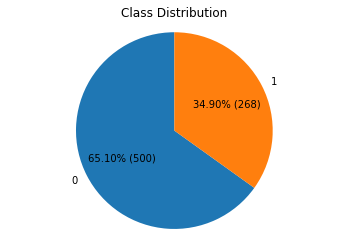

In [5]:
counts = df['diabetes'].value_counts()
labels = counts.index.values # array([0, 1])
values = counts.values # array([500, 268])
 
def make_custom_autopct(values):
    def custom_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}% ({v:d})'.format(p=pct,v=val)
    return custom_autopct
 
fig1, ax1 = plt.subplots()
plt.title("Class Distribution")
ax1.pie(values, labels=labels, autopct=make_custom_autopct(values), startangle=90)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Seaborn

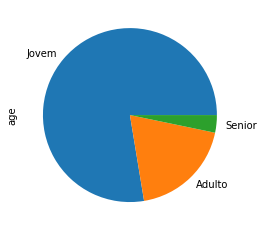

In [7]:
df['age'].value_counts(bins=3).plot(kind='pie', labels=['Jovem', 'Adulto', 'Senior'])

# Bar Chart 

##  Vertical

### Matplotlib

['0-3', '4-7', '8-11', '12-15']
[311, 135, 44, 10]
[113, 85, 57, 12]


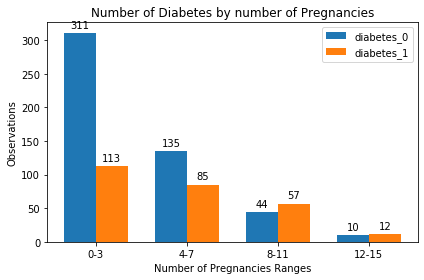

In [6]:
counts = df['diabetes'].value_counts()
labels = counts.index.values # array([0, 1])
values = counts.values # array([500, 268])
 
# Dividing into groups of ranges
groups = int(df['num_preg'].max() / 4)
 
labels = []
for i in range(groups):
    start = i * groups
    end = start + (groups - 1)
    labels.append(str(start)+'-'+str(end))
#     labels.append(str(start)+'-'+str(end)+':P')
 
print(labels) #['0-3', '4-7', '8-11', '12-15']
    
diabetes_0 = [] 
diabetes_1 = []
for i in range(groups):
    # TODO deal with the last range so it gets all greater than
    start = i * groups
    end = start + (groups - 1)
    df_filtered = df[(df['num_preg'] >= start) & (df['num_preg'] <= end ) & (df['diabetes'] == 0 )] 
    df_filtered2 = df[(df['num_preg'] >= start) & (df['num_preg'] <= end ) & (df['diabetes'] == 1 )]
    diabetes_0.append(len(df_filtered['num_preg']))
    diabetes_1.append(len(df_filtered2['num_preg']))
    
print(diabetes_0) # [311, 135, 44, 10]
print(diabetes_1) # [113, 85, 57, 12]
 
 
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
 
fig, axes = plt.subplots()
 
rects1 = axes.bar(x - width/2, diabetes_0, width, label='diabetes_0')
rects2 = axes.bar(x + width/2, diabetes_1, width, label='diabetes_1')
 
# Add some text for labels, title and custom x-axis tick labels, etc.
axes.set_ylabel('Observations')
axes.set_xlabel('Number of Pregnancies Ranges')
axes.set_title('Number of Diabetes by number of Pregnancies')
axes.set_xticks(x)
axes.set_xticklabels(labels)
axes.legend()
 
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        axes.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
 
autolabel(rects1)
autolabel(rects2)
 
fig.tight_layout()
 
plt.show()

### Seaborn

In [7]:
nome_colunas = ['Class', 'Age', 'Gender', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'LiverBig',
                'LiverFirm', 'SpleenPalpable', 'Spiders', 'Ascites', 'Varices', 'Bilirubin','AlkPhosphate', 'SGOT',
                'Albumin', 'Protime', 'Histology']

dados_hepatite = pd.read_csv('datasets/dataset-hepatite.data', names = nome_colunas, sep = ',', encoding = 'latin-1')
dados_hepatite.replace('?', np.nan, inplace = True) # replace ? com valores NaN

def inpute_median(series): # função para o replace das linhas vazias
    return series.fillna(series.median())

cols_to_transform = ['Steroid','Fatigue','Malaise','Anorexia','LiverBig','LiverFirm','SpleenPalpable','Ascites','Varices','Spiders','Bilirubin','SGOT']
for col in cols_to_transform:
    dados_hepatite[col] = dados_hepatite[col].transform(inpute_median)
    
by_class = dados_hepatite.groupby(['Class'])
dados_hepatite.AlkPhosphate = by_class['AlkPhosphate'].transform(inpute_median)

by_bil_class = dados_hepatite.groupby(['Class'])
dados_hepatite.Albumin = by_bil_class['Albumin'].transform(inpute_median)
dados_hepatite.Protime = by_bil_class['Protime'].transform(inpute_median)

dados_hepatite.head(20)

cols = dados_hepatite.columns[dados_hepatite.dtypes.eq('object')] # extrai as colunas do tipo object (qualitativas)
dados_hepatite[cols] = dados_hepatite[cols].apply(pd.to_numeric, errors = 'coerce') # converte as colunas para o tipo numérico

def tipoPessoa_func(gender): # preencher uma nova coluna com o sexo do paciente: 0 - Mulher e 1 - Homem
    return 'Homem' if gender.values.item() == 1 else 'Mulher'
dados_hepatite['Sexo_Pessoa'] = dados_hepatite[['Gender']].apply(tipoPessoa_func, axis = 1) # aplica a função

def statusPaciente_func(live): # preencher uma nova coluna com o status do paciente: 0 - Faleceu e 1 - Não Faleceu
    return 'Faleceu' if live.values.item() == 1 else 'Não Faleceu'
dados_hepatite['Status_Paciente'] = dados_hepatite[['Class']].apply(statusPaciente_func, axis = 1) # aplica a função

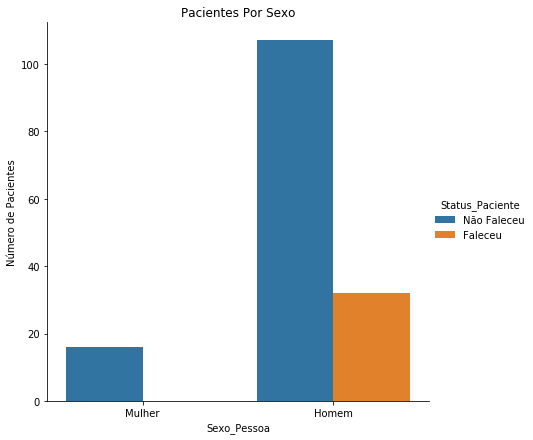

In [8]:
# Como o número de doentes é afetado pelo sexo da pessoa.
mx = sns.catplot(x = "Sexo_Pessoa", hue = 'Status_Paciente', data = dados_hepatite, kind = "count", height = 6)
mx.set(ylabel = 'Número de Pacientes')
plt.title('Pacientes Por Sexo');

## Horizontal

### Pandas

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'skin_thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'diabetes'],
      dtype='object')


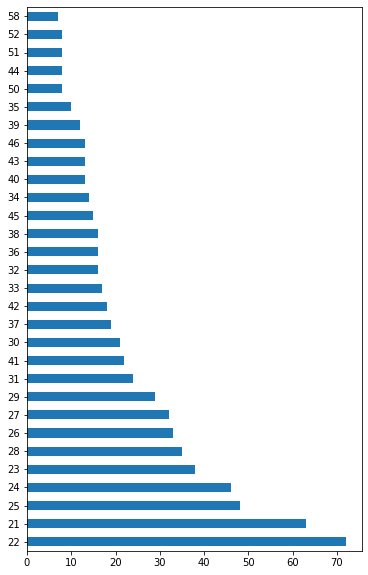

In [18]:
print(df.columns)
df['age'].value_counts().head(30).plot(kind='barh', figsize=(6,10))

#  Heatmap – Correlation Matrix

## Seaborn

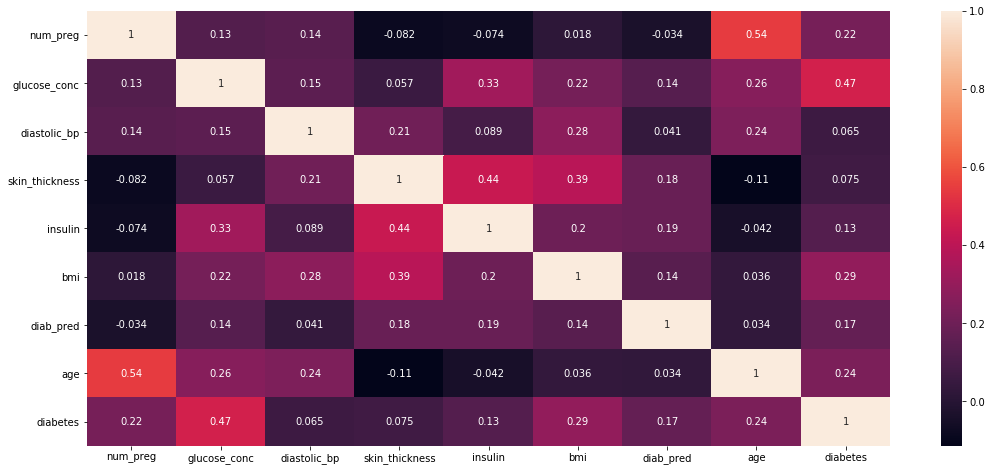

In [9]:
correlation = df.corr()
 
plt.figure(figsize=(18,8))
sns.heatmap(correlation, annot = True)
plt.show()

#  Heatmap – Missing Analysis

Text(0.5, 1, 'Valores Ausentes')

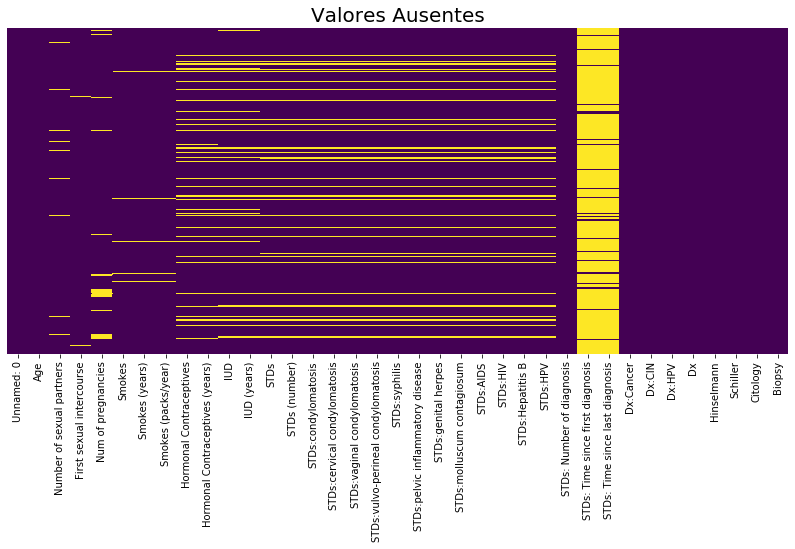

In [7]:
df = pd.read_csv('datasets/risk_factors_cervical_cancer_nan.csv')

# Heatmap para Visualizar os Valores Ausentes por variável
plt.figure(figsize = (14,6))
p = sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
p.axes.set_title("Valores Ausentes", fontsize = 20)

# Confusion Matrix

## Seaborn

In [11]:
# Calculando a Confusion Matrix
dados_hepatite.drop(['Sexo_Pessoa','Status_Paciente'], axis = 1, inplace = True)

X_hepatite = dados_hepatite.drop(['Class'], axis = 1)
y_hepatite = dados_hepatite.Class

X_treino_hepatite, X_teste_hepatite, y_treino_hepatite, y_teste_hepatite = train_test_split(X_hepatite, y_hepatite, random_state = 23) # divisão em dados de treino e de teste

cls_v1 = LogisticRegression()
modelo_v1 = cls_v1.fit(X_treino_hepatite, y_treino_hepatite)

y_pred_class_hepatite = modelo_v1.predict(X_teste_hepatite)


conf = metrics.confusion_matrix(y_teste_hepatite, y_pred_class_hepatite)
print(conf)

[[ 3  4]
 [ 1 31]]


/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


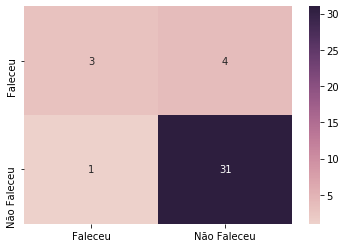

In [12]:
# Criando a Confusion Matrix de forma visual
cmap = sns.cubehelix_palette(as_cmap = True)
sns.heatmap(conf, cmap = cmap, xticklabels = ['Faleceu','Não Faleceu'], yticklabels = ['Faleceu','Não Faleceu'], annot = True, fmt='g')

# Pairplot

## Seaborn

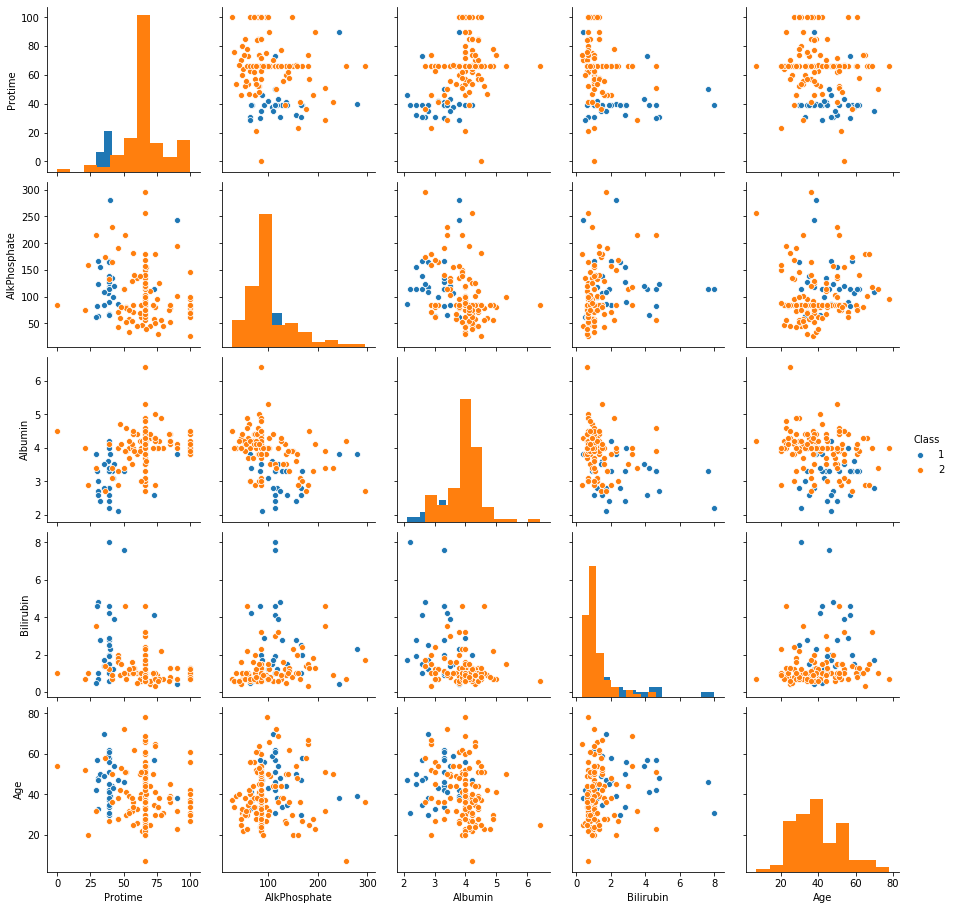

In [13]:
cols = ['Protime','AlkPhosphate', 'Albumin', 'Bilirubin','Age','Class']
g = sns.pairplot(dados_hepatite[cols], diag_kind = "hist", hue = 'Class')

# ROC Curve

## Scikit Learn

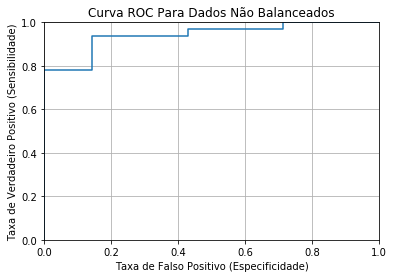

In [23]:
predict_probabilities = modelo_v1.predict_proba(X_teste_hepatite)
y_true = np.array(y_teste_hepatite)
y_true_0_1 = [0 if v == 1 else 1 for v in y_true ]
fpr, tpr, thresholds = roc_curve(y_true_0_1, predict_probabilities[:,1])

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Curva ROC Para Dados Não Balanceados')
plt.xlabel('Taxa de Falso Positivo (Especificidade)')
plt.ylabel('Taxa de Verdadeiro Positivo (Sensibilidade)')
plt.grid(True)

# References

https://seaborn.pydata.org/